In [2]:
import numpy as np
import pandas as pd

In [3]:
# Usaremos o dataset no qual mediremos o comprimento de um cateter (em cm) de acordo com a altura (em metros) do paciente
df = pd.DataFrame(data=[[1.087, 37], [1.613, 50], [0.953, 34], [1.003, 36], [1.156,43], [0.978, 28], [1.092, 37], [0.572, 20], [0.940, 34], [0.597, 30], [0.838, 38], [1.473, 47]], columns=['Altura','Comprimento'])

In [4]:
df

,Altura,Comprimento
0,1.087,37
1,1.613,50
2,0.953,34
3,1.003,36
4,1.156,43
5,0.978,28
6,1.092,37
7,0.572,20
8,0.940,34
9,0.597,30


In [5]:
poli2 = lambda x: x*x

In [6]:
poli2_df = df
poli2_df.insert(loc=1, column='Altura2', value=df['Altura'].apply(poli2))

In [7]:
poli2_df

,Altura,Altura2,Comprimento
0,1.087,1.181569,37
1,1.613,2.601769,50
2,0.953,0.908209,34
3,1.003,1.006009,36
4,1.156,1.336336,43
5,0.978,0.956484,28
6,1.092,1.192464,37
7,0.572,0.327184,20
8,0.940,0.883600,34
9,0.597,0.356409,30


y = wo + w1.x + w2.xˆ2

In [31]:
w0 = 0
w1 = 0
w2 = 0
alfa = 0.001 # Taxa de aprendizado
EQM = []

for epoca in range(1000):
    acc = 0
    sumw0 = 0
    sumw1 = 0
    sumw2 = 0

    for i in range(len(poli2_df)):
        x_i_1 = poli2_df.iloc[i, 0]
        x_i_2 = poli2_df.iloc[i, 1]
        y_i = poli2_df.iloc[i, 2]

        erro = (y_i - w1*x_i_1 - w2*x_i_2 - w0)
        acc += erro * erro

        w0 += (alfa * erro) 
        w1 += (alfa * erro * x_i_1)
        w2 += (alfa * erro * x_i_2)

    #     sumw0 += erro 
    #     sumw1 += erro * x_i_1
    #     sumw2 += erro * x_i_2

    # w0 += (alfa * sumw0) 
    # w1 += (alfa * sumw1) 
    # w2 += (alfa * sumw2) 


    EQM.append(acc / len(poli2_df))

In [35]:
print(w0, w1, w2)

16.57869260418355 11.864301471685447 6.38729848218983


In [10]:
def predict(w0, w1, w2, x):
    y = w0 + w1 * x + w2 * x * x
    return y

In [32]:
poly = np.poly1d([w2, w1, w0]) # os pesos devem ser passados do maior grau ao menor

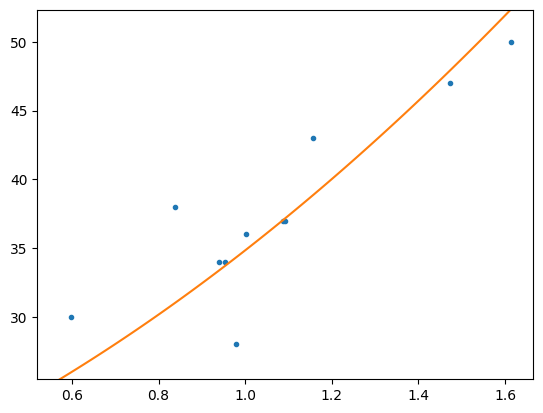

In [33]:
import matplotlib.pyplot as plt
x = df['Altura']
y = df['Comprimento']
xp = np.linspace(x.min(), x.max(), 100)
_ = plt.plot(x, y, '.', xp, poly(xp), '-')
plt.ylim(poly(x.min()),poly(x.max()))
plt.show()

In [13]:
poli2_df

,Altura,Altura2,Comprimento
0,1.087,1.181569,37
1,1.613,2.601769,50
2,0.953,0.908209,34
3,1.003,1.006009,36
4,1.156,1.336336,43
5,0.978,0.956484,28
6,1.092,1.192464,37
7,0.572,0.327184,20
8,0.940,0.883600,34
9,0.597,0.356409,30


In [37]:
predict(w0, w1, w2, 0.572)

25.454894912584425